In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
filename='processed\SAP_Test_Data_BKPF Table.txt_processed'

In [3]:
filename='processed\SAP_Test_Data_GLT0 Table.txt_processed'

In [4]:
filename='processed\SAP_Test_Data_BSEG Table.txt_processed'

In [5]:
df= pd.read_csv(filename,sep='|',dtype=str,low_memory=False)
df_string= pd.read_csv(filename,sep='|',dtype=str,low_memory=False)
df.head(5)

,Buchungskreis,Belegnummer,Geschäftsjahr,Position,Buchungszeilen-Id,Ausgleichsdatum,Erf.Dat. Ausgleich,Ausgleichsbeleg,Buchungsschlüssel,Kontoart,...,Ende des Leistungserbringungszeitraums,Knz. für Fast Pay,IGNR_IVREF,Felder US-Regierung,HHM-Referenzbelegnummer,HHM-Referenzjahr,HHM-Referenzeinzelposten,HHM-Referenzabfolge der Kontierungen,Produktionsmonat,RECRF
0,1710,100002131,2016,1,NaN,NaN,NaN,NaN,40,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,1710,100002131,2016,2,NaN,NaN,NaN,NaN,50,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,1710,100002132,2016,1,NaN,NaN,NaN,NaN,40,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,1710,100002132,2016,2,NaN,NaN,NaN,NaN,50,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,1710,100002133,2016,1,NaN,NaN,NaN,NaN,40,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


In [6]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
pbjekts

,types
Buchungskreis,object
Belegnummer,object
Geschäftsjahr,object
Position,object
Buchungszeilen-Id,object
...,...
HHM-Referenzjahr,object
HHM-Referenzeinzelposten,object
HHM-Referenzabfolge der Kontierungen,object
Produktionsmonat,object


In [7]:
df['Buchungsdatum'].unique()[0]
#df['Buchungsbetrag'].isnull().values.all()
#(df['Buchungsbetrag'] == '0.0').all()

'2016-01-01 00:00:00'

In [8]:
def convert_int(convert,df):
    pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
    for x in pbjekts[pbjekts['types']=='object'].index.to_list():
        try:
            df[x]=df[x].astype(convert)
        except:
            pass

In [9]:
def date_check(df,var):
    col=[s for s in df.columns.to_list() if any([x.lower for x in var if x.lower() in s.lower()])]
    for x in col:
        if df[x].str.len().mean()==4:
            #print('ja')
            col.remove(x)
    return col
    

In [10]:
var=['jahr','datum','Dat']
col=date_check(df,var)
df[col]=df.loc[:,col].apply(pd.to_datetime)
var2=['zeit','uhr']
col2=date_check(df,var2)
df[col2]=df.loc[:,col2].apply(pd.to_datetime)
for x in col2:
    df[x]=df[x].dt.time


In [11]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
list=pbjekts[pbjekts['types']=='object'].index.to_list()
zeiten=['jahr','datum','Dat','zeit','uhr']
new_list= [s for s in list if not any([x.lower for x in zeiten if x in s.lower()])]
new_list = [s for s in list if not df[s].isnull().values.all()]
new_list= [s for s in list if not (df[s] == '0.0').all()] 
new_list= [s for s in list if not (df[s] == 0.0).all()] 
new_list= [s for s in list if not (df[s] == 0).all()] 
new_list= [s for s in list if not (df[s] == 'nan').all()] 
new_list

['Buchungskreis',
 'Belegnummer',
 'Geschäftsjahr',
 'Position',
 'Buchungszeilen-Id',
 'Ausgleichsbeleg',
 'Buchungsschlüssel',
 'Kontoart',
 'Sonderhauptb.Kennz.',
 'Vorgangsklasse SHB',
 'Ziel-Sonderhb.Kz.',
 'Soll/Haben-Kennz.',
 'Geschäftsbereich',
 'PartnerGsber',
 'Steuerkennzeichen',
 'Quellsteuerkennz.',
 'Betrag Hauswähr',
 'Betrag',
 'Urspr.Kürzungsbetrag',
 'Betrag Hauptbuch',
 'Währung Hauptbuch',
 'urspr. Steuerbasisbetrag',
 'urspr. Steuerbasisbetrag.1',
 'Steuer Hauswährung',
 'Steuerbetrag',
 'HW-Steuerbasis',
 'Steuerbasisbetrag',
 'HW-Rückstellung',
 'Zusatzsteuer',
 'Vorzeichen Skonto',
 'Komponente der Versionsnummer',
 'Steuerart',
 'Gruppenkennzeichen',
 'Vorgang',
 'Quellsteuerbasis',
 'Gesicherter Kurs',
 'Gesicherter Betrag',
 'Bewertungsdiffer.',
 'Bewertungsdifferenz 2',
 'Zuordnung',
 'Text',
 'Zinssperre',
 'Partnergesellschaft',
 'Bewegungsart',
 'Konzernkontonummer',
 'Vorgangsart GL',
 'Dispositions-Ebene',
 'Dispositionsgruppe',
 'Disponierter Betrag',

In [12]:

df['Buchungskreis']=df['Buchungskreis'].astype(int)

In [13]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
pbjekts

,types
Buchungskreis,int32
Belegnummer,object
Geschäftsjahr,object
Position,object
Buchungszeilen-Id,object
...,...
HHM-Referenzjahr,datetime64[ns]
HHM-Referenzeinzelposten,object
HHM-Referenzabfolge der Kontierungen,object
Produktionsmonat,object


In [14]:
for column in new_list:
    try:
        if any(round(df[column].astype(float)) != df[column].astype(float)):
            print('float: ',column)
            df[column]=df[column].astype(float)
        elif all(round(df[column].astype(float)) == df[column].astype(float)):
            print('int: ',column)
            df[column]=df[column].astype(int).round()
    except:
        print('STR: ',column)

        #pass


int:  Buchungskreis
int:  Belegnummer
int:  Geschäftsjahr
int:  Position
float:  Buchungszeilen-Id
float:  Ausgleichsbeleg
int:  Buchungsschlüssel
STR:  Kontoart
float:  Sonderhauptb.Kennz.
float:  Vorgangsklasse SHB
float:  Ziel-Sonderhb.Kz.
STR:  Soll/Haben-Kennz.
float:  Geschäftsbereich
float:  PartnerGsber
float:  Steuerkennzeichen
float:  Quellsteuerkennz.
float:  Betrag Hauswähr
float:  Betrag
int:  Urspr.Kürzungsbetrag
STR:  Urspr.Kürzungsbetrag
float:  Betrag Hauptbuch
STR:  Währung Hauptbuch
int:  urspr. Steuerbasisbetrag
STR:  urspr. Steuerbasisbetrag
int:  urspr. Steuerbasisbetrag.1
STR:  urspr. Steuerbasisbetrag.1
int:  Steuer Hauswährung
STR:  Steuer Hauswährung
int:  Steuerbetrag
STR:  Steuerbetrag
int:  HW-Steuerbasis
STR:  HW-Steuerbasis
int:  Steuerbasisbetrag
STR:  Steuerbasisbetrag
int:  HW-Rückstellung
STR:  HW-Rückstellung
int:  Zusatzsteuer
STR:  Zusatzsteuer
float:  Vorzeichen Skonto
float:  Komponente der Versionsnummer
float:  Steuerart
int:  Gruppenkennzeiche

In [15]:
df.describe()

,Buchungskreis,Belegnummer,Geschäftsjahr,Position,Buchungszeilen-Id,Ausgleichsbeleg,Buchungsschlüssel,Sonderhauptb.Kennz.,Vorgangsklasse SHB,Ziel-Sonderhb.Kz.,...,Partner Budgtperiode,J_1TPBUPL,Knz. für Fast Pay,IGNR_IVREF,Felder US-Regierung,HHM-Referenzbelegnummer,HHM-Referenzeinzelposten,HHM-Referenzabfolge der Kontierungen,Produktionsmonat,RECRF
count,5000.0,5.000000e+03,5000.0,5000.00000,0.0,1.117000e+03,5000.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,5000.0,0.0,0.0
mean,1710.0,8.595655e+08,2016.0,1.50000,NaN,1.400005e+09,36.287400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
std,0.0,8.452583e+08,0.0,0.50005,NaN,1.117841e+03,19.392865,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
min,1710.0,1.000021e+08,2016.0,1.00000,NaN,1.400004e+09,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
25%,1710.0,1.000063e+08,2016.0,1.00000,NaN,1.400004e+09,40.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
50%,1710.0,1.000105e+08,2016.0,1.50000,NaN,1.400005e+09,45.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
75%,1710.0,1.800003e+09,2016.0,2.00000,NaN,1.400006e+09,50.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
max,1710.0,1.800009e+09,2016.0,2.00000,NaN,1.400007e+09,50.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [16]:
df_string.describe()

,Buchungskreis,Belegnummer,Geschäftsjahr,Position,Buchungszeilen-Id,Ausgleichsdatum,Erf.Dat. Ausgleich,Ausgleichsbeleg,Buchungsschlüssel,Kontoart,...,Ende des Leistungserbringungszeitraums,Knz. für Fast Pay,IGNR_IVREF,Felder US-Regierung,HHM-Referenzbelegnummer,HHM-Referenzjahr,HHM-Referenzeinzelposten,HHM-Referenzabfolge der Kontierungen,Produktionsmonat,RECRF
count,5000,5000,5000,5000,0,1117,1117,1117,5000,5000,...,0,0,0,0,0,0,5000,5000,0,0
unique,1,2500,1,2,0,99,1,391,3,2,...,0,0,0,0,0,0,1,1,0,0
top,1710,100002131,2016,1,NaN,2016-01-01 00:00:00,2016-12-16 00:00:00,1400003709,50,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
freq,5000,2,5000,2500,NaN,53,1117,8,2500,3883,...,NaN,NaN,NaN,NaN,NaN,NaN,5000,5000,NaN,NaN


In [17]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
pbjekts

,types
Buchungskreis,int32
Belegnummer,int32
Geschäftsjahr,int32
Position,int32
Buchungszeilen-Id,float64
...,...
HHM-Referenzjahr,datetime64[ns]
HHM-Referenzeinzelposten,int32
HHM-Referenzabfolge der Kontierungen,int32
Produktionsmonat,float64


In [25]:
pbjekts['unique']=df.nunique()
pbjekts['null']=df.isna().sum()
pbjekts['not_null']=df.count()
pbjekts

,types,unique,null,not_null
Buchungszeilen-Id,float64,0,5000,0
Ausgleichsdatum,datetime64[ns],99,3883,1117
Erf.Dat. Ausgleich,datetime64[ns],1,3883,1117
Ausgleichsbeleg,float64,391,3883,1117
Sonderhauptb.Kennz.,float64,0,5000,0
...,...,...,...,...
Felder US-Regierung,float64,0,5000,0
HHM-Referenzbelegnummer,float64,0,5000,0
HHM-Referenzjahr,datetime64[ns],0,5000,0
Produktionsmonat,float64,0,5000,0


In [23]:
df.count()

Buchungskreis                           5000
Belegnummer                             5000
Geschäftsjahr                           5000
Position                                5000
Buchungszeilen-Id                          0
                                        ... 
HHM-Referenzjahr                           0
HHM-Referenzeinzelposten                5000
HHM-Referenzabfolge der Kontierungen    5000
Produktionsmonat                           0
RECRF                                      0
Length: 368, dtype: int64

In [19]:
df['Ausgleichsdatum'].value_counts(dropna=False)

NaT           3883
2016-01-01      53
2016-01-02      52
2016-01-09      49
2016-01-25      49
              ... 
2016-01-21       1
2016-04-15       1
2016-02-13       1
2016-01-29       1
2016-01-22       1
Name: Ausgleichsdatum, Length: 100, dtype: int64

In [20]:
df['Ausgleichsdatum'].isna().sum()

3883

In [21]:
df['Ausgleichsdatum'].count()

1117

In [22]:
from turtle import backward


def anteil_null_values(df,column):
    null=df[column].isna().sum()
    notnull=df[column].count()
    explode=(0, 0.1)
    fig1, ax1 = plt.subplots()
    plt.title(f"Percentage of null values of {column}")
    ax1.pie([null,notnull], explode=explode, labels=['Null Values', 'Not Null Values'], autopct='%1.1f%%',
        shadow=True, startangle=90,)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


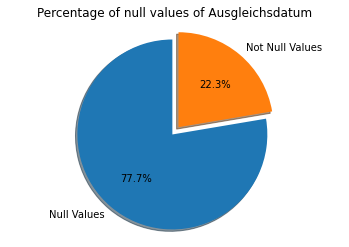

In [23]:
anteil_null_values(df_string,'Ausgleichsdatum')

In [24]:
df.replace(0, np.nan, inplace=True)
# #df=df.replace(0.0, np.nan, inplace=True)
# df=df.replace('0', np.nan, inplace=True)
# df=df.replace('0.0', np.nan, inplace=True)


In [25]:
#df.replace(0.0, np.nan, inplace=True)


In [26]:
#df.replace('0', np.nan, inplace=True)


In [27]:
#df.replace('0.0', np.nan, inplace=True)

In [28]:
df_string.describe()

,Buchungskreis,Belegnummer,Geschäftsjahr,Position,Buchungszeilen-Id,Ausgleichsdatum,Erf.Dat. Ausgleich,Ausgleichsbeleg,Buchungsschlüssel,Kontoart,...,Ende des Leistungserbringungszeitraums,Knz. für Fast Pay,IGNR_IVREF,Felder US-Regierung,HHM-Referenzbelegnummer,HHM-Referenzjahr,HHM-Referenzeinzelposten,HHM-Referenzabfolge der Kontierungen,Produktionsmonat,RECRF
count,5000,5000,5000,5000,0,1117,1117,1117,5000,5000,...,0,0,0,0,0,0,5000,5000,0,0
unique,1,2500,1,2,0,99,1,391,3,2,...,0,0,0,0,0,0,1,1,0,0
top,1710,100002131,2016,1,NaN,2016-01-01 00:00:00,2016-12-16 00:00:00,1400003709,50,S,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
freq,5000,2,5000,2500,NaN,53,1117,8,2500,3883,...,NaN,NaN,NaN,NaN,NaN,NaN,5000,5000,NaN,NaN


In [29]:
column_data=df_string.describe()['count':'unique'].transpose()
column_data=column_data[column_data['count']!=0]
column_data_für_kar=column_data[column_data['unique']<=10]
kar_list=column_data_für_kar.index.to_list()

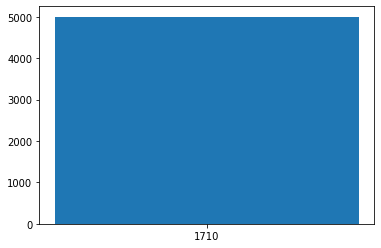

In [30]:
value=pd.DataFrame(df_string['Buchungskreis'].value_counts()).reset_index(drop=False)
fig, ax = plt.subplots()

ax.bar(value['index'],value['Buchungskreis'])
plt.show()

In [31]:
for x in kar_list:
    #print(df[x].unique())
    print(df_string[x].value_counts())

1710    5000
Name: Buchungskreis, dtype: int64
2016    5000
Name: Geschäftsjahr, dtype: int64
1    2500
2    2500
Name: Position, dtype: int64
2016-12-16 00:00:00    1117
Name: Erf.Dat.  Ausgleich, dtype: int64
50    2500
40    1383
01    1117
Name: Buchungsschlüssel, dtype: int64
S    3883
D    1117
Name: Kontoart, dtype: int64
S    2500
H    2500
Name: Soll/Haben-Kennz., dtype: int64
0.0    5000
Name: Urspr.Kürzungsbetrag, dtype: int64
USD    5000
Name: Währung Hauptbuch, dtype: int64
0.0    5000
Name: urspr. Steuerbasisbetrag, dtype: int64
0.0    5000
Name: urspr. Steuerbasisbetrag.1, dtype: int64
0.0    5000
Name: Steuer Hauswährung, dtype: int64
0.0    5000
Name: Steuerbetrag, dtype: int64
0.0    5000
Name: HW-Steuerbasis, dtype: int64
0.0    5000
Name: Steuerbasisbetrag, dtype: int64
0.0    5000
Name: HW-Rückstellung, dtype: int64
0.0    5000
Name: Zusatzsteuer, dtype: int64
0    5000
Name: Gruppenkennzeichen, dtype: int64
0.0    5000
Name: Quellsteuerbasis, dtype: int64
0.0    5

In [32]:
def barchar_plot(df,column):
    values=pd.DataFrame(df[column].value_counts()).reset_index(drop=False)
    fig, ax = plt.subplots()
    ax.bar(values['index'].to_list(),values[column].to_list())
    plt.title(f'Unique values of {column}')
    plt.show()

In [43]:
values=pd.DataFrame(df_string['Position'].value_counts()).reset_index(drop=False)
values

,index,Position
0,1,2500
1,2,2500


In [56]:
values['index'].to_list()
numbers = [ int(x) for x in values['index'].to_list() ]
position=[ int(x) for x in values['Position'].to_list() ]

numbers

[1, 2]

In [58]:
from bokeh.plotting import figure, output_notebook, show
langs = values['index'].to_list()
students = [ int(x) for x in values['Position'].to_list() ]
fig = figure(x_range = langs, plot_width = 300, plot_height = 300)
fig.vbar(x = langs, top = students, width = 0.5)
show(fig)

In [51]:
from bokeh.plotting import figure, output_notebook, show
fig = figure(plot_width = 200, plot_height = 400)
fig.vbar(x = [1,2,3], width = 0.5, bottom = 0, top = [2,4,6], color = "Cyan")
output_notebook()
show(fig)

Loading BokehJS ...

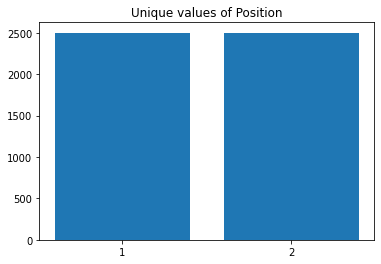

In [34]:
barchar_plot(df_string,'Position')

In [35]:
df_string['Position'].describe()

count     5000
unique       2
top          1
freq      2500
Name: Position, dtype: object

In [26]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
types_df=pd.DataFrame(pbjekts['types'].value_counts()).reset_index(drop=False)
types_df

,index,types
0,float64,198
1,object,103
2,int32,43
3,datetime64[ns],24


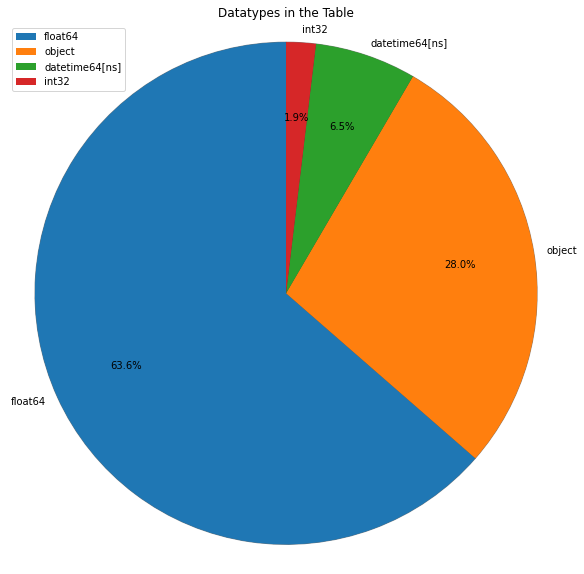

In [37]:

fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.title(f"Datatypes in the Table")
explode = (0, 0.1, 0, 0)
ax1.pie(types_df['types'], explode=explode, labels=types_df['index'], autopct='%1.1f%%', pctdistance=0.7,labeldistance=1.05,radius=2000, 
    shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()


In [193]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import BuGn,PRGn
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.plotting import figure, output_notebook, show


# ax1.pie(types_df['types'], explode=explode, labels=types_df['index'], autopct='%1.1f%%', pctdistance=0.7,labeldistance=1.05,radius=2000, 
#     shadow=True, startangle=90)
types_df['types']
data= types_df.copy()
data=data.rename(columns={'index':'type','types':'number'})
z=data.set_index('type').to_dict()['number']
z

{dtype('float64'): 234,
 dtype('O'): 103,
 dtype('<M8[ns]'): 24,
 dtype('int32'): 7}

In [172]:
studentDict = dict(zip(data.type.astype(str), data.number))
studentDict

{'float64': 234, 'object': 103, 'datetime64[ns]': 24, 'int32': 7}

In [156]:
data

,type,number
0,float64,234
1,object,103
2,datetime64[ns],24
3,int32,7


In [196]:
data_fix = pd.Series(studentDict).reset_index(name='value').rename(columns={'index': 'country'})
data_fix['angle'] = data_fix['value']/data_fix['value'].sum() * 2*pi
data_fix['color'] = BuGn[len(x)]
data_fix.dtypes


country     object
value        int64
angle      float64
color       object
dtype: object

In [191]:
data_fix

,country,value,angle,color
0,float64,234,3.995286,#238b45
1,object,103,1.758609,#66c2a4
2,datetime64[ns],24,0.409773,#b2e2e2
3,int32,7,0.119517,#edf8fb


In [164]:

#data["angle"] = pd.to_numeric(data["angle"], downcast="integer")
data.dtypes

type      object
number     int64
dtype: object

In [197]:
p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data_fix)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

In [148]:
from math import pi

import pandas as pd

from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

x = {
    'float64':   234
   ,'object': 103
   ,'datetime64[ns]':	24
   ,'int32': 7
}
{dtype('float64'): 234,
 dtype('O'): 103,
 dtype('<M8[ns]'): 24,
 dtype('int32'): 7}

data_2 = pd.Series(x).reset_index(name='value').rename(columns={'index': 'country'})
data_2['angle'] = data_2['value']/data_2['value'].sum() * 2*pi
data_2['color'] = Category20c[len(x)]
data_2.dtypes


country     object
value        int64
angle      float64
color       object
dtype: object

In [150]:
data_2

,country,value,angle,color
0,float64,234,3.995286,#3182bd
1,object,103,1.758609,#6baed6
2,datetime64[ns],24,0.409773,#9ecae1
3,int32,7,0.119517,#c6dbef


In [167]:
p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data_2)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

In [38]:
df.corr()

,Buchungskreis,Belegnummer,Geschäftsjahr,Position,Buchungszeilen-Id,Ausgleichsbeleg,Buchungsschlüssel,Sonderhauptb.Kennz.,Vorgangsklasse SHB,Ziel-Sonderhb.Kz.,...,Partner Budgtperiode,J_1TPBUPL,Knz. für Fast Pay,IGNR_IVREF,Felder US-Regierung,HHM-Referenzbelegnummer,HHM-Referenzeinzelposten,HHM-Referenzabfolge der Kontierungen,Produktionsmonat,RECRF
Buchungskreis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belegnummer,NaN,1.000000e+00,NaN,4.485297e-18,NaN,-0.118628,-0.499958,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Geschäftsjahr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,NaN,4.485297e-18,NaN,1.000000e+00,NaN,NaN,-0.421878,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buchungszeilen-Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HHM-Referenzbelegnummer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHM-Referenzeinzelposten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHM-Referenzabfolge der Kontierungen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Produktionsmonat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['Erf.Dat.  Ausgleich'].unique()

array([                          'NaT', '2016-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

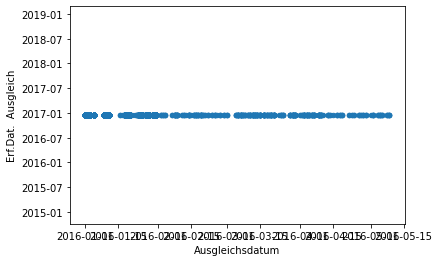

In [40]:
ax1=df[['Ausgleichsdatum','Erf.Dat.  Ausgleich']].plot.scatter(x='Ausgleichsdatum',y='Erf.Dat.  Ausgleich')

In [41]:
pd.DataFrame(df['Buchungskreis'].describe()).reset_index(drop=False)

,index,Buchungskreis
0,count,5000.0
1,mean,1710.0
2,std,0.0
3,min,1710.0
4,25%,1710.0
5,50%,1710.0
6,75%,1710.0
7,max,1710.0


In [42]:
def show_info_for_column(df,column):
    return pd.DataFrame(df[column].describe()).reset_index(drop=False)
    